In [1]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls -O
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Readme.txt -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  122k  100  122k    0     0  97752      0  0:00:01  0:00:01 --:--:-- 97752
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3808  100  3808    0     0   5230      0 --:--:-- --:--:-- --:--:--  5223


In [2]:
!ls

3D Objects
Anaconda3
AppData
Application Data
Concrete_Data.xls
Concrete_Readme.txt
Contacts
Cookies
Desktop
Documents
Downloads
Favorites
Links
Local Settings
MicrosoftEdgeBackups
Music
My Documents
NTUSER.DAT
NTUSER.DAT{1c3790b4-b8ad-11e8-aa21-e41d2d101530}.TM.blf
NTUSER.DAT{1c3790b4-b8ad-11e8-aa21-e41d2d101530}.TMContainer00000000000000000001.regtrans-ms
NTUSER.DAT{1c3790b4-b8ad-11e8-aa21-e41d2d101530}.TMContainer00000000000000000002.regtrans-ms
NetHood
OneDrive
Pictures
PrintHood
Recent
Saved Games
Searches
SendTo
Start Menu
Templates
Untitled.ipynb
Videos
VirtualBox VMs
auto-mpg.data
auto-mpg.names
ntuser.dat.LOG1
ntuser.dat.LOG2
ntuser.ini
wekafiles


In [3]:
!cat Concrete_Readme.txt

Concrete Compressive Strength 

---------------------------------

Data Type: multivariate
 
Abstract: Concrete is the most important material in civil engineering. The 
concrete compressive strength is a highly nonlinear function of age and 
ingredients. These ingredients include cement, blast furnace slag, fly ash, 
water, superplasticizer, coarse aggregate, and fine aggregate.

---------------------------------

Sources: 

  Original Owner and Donor
  Prof. I-Cheng Yeh
  Department of Information Management 
  Chung-Hua University, 
  Hsin Chu, Taiwan 30067, R.O.C.
  e-mail:icyeh@chu.edu.tw
  TEL:886-3-5186511

  Date Donated: August 3, 2007
 
---------------------------------

Data Characteristics:
    
The actual concrete compressive strength (MPa) for a given mixture under a 
specific age (days) was determined from laboratory. Data is in raw form (not scaled). 

Summary Statistics: 

Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitat

In [4]:
#Mean imputation isn't needed bcause there is no missing values
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel("Concrete_Data.xls", names=["Cement", "Blast Furnace Slag", "Fly Ash", "Water", "Superplasticizer", "Coarse Aggregate", "Fine Aggregate", "Age", "Concrete compressive strength"])

In [6]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [7]:
df.dtypes

Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age                                int64
Concrete compressive strength    float64
dtype: object

In [8]:
#Making everything floats so there is no variation in the data that may mess with the model later
df["Age"] = df["Age"].astype(float)

In [9]:
df.dtypes

Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age                              float64
Concrete compressive strength    float64
dtype: object

In [10]:
#Remove answer to not mess with feature selection and for test/train split later
from sklearn.utils.multiclass import type_of_target
x = df.drop("Concrete compressive strength", axis = 1)
y = df["Concrete compressive strength"]

In [11]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

In [12]:
#Binning to remove noisy data and squash outliers, done on all attributes
def binning(string):
    split = [[v] for v in x[string]]
    est.fit(split)
    transformed = est.transform(split)
    x[string] = transformed

est = KBinsDiscretizer(n_bins = 5, encode = "ordinal", strategy = "quantile") #Splits data into 5 equal bins then computes their average
names = list(x)
for string in names:
    binning(string)

x_bin = x.copy()

C:\Users\reuben\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\reuben\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\reuben\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\reuben\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing

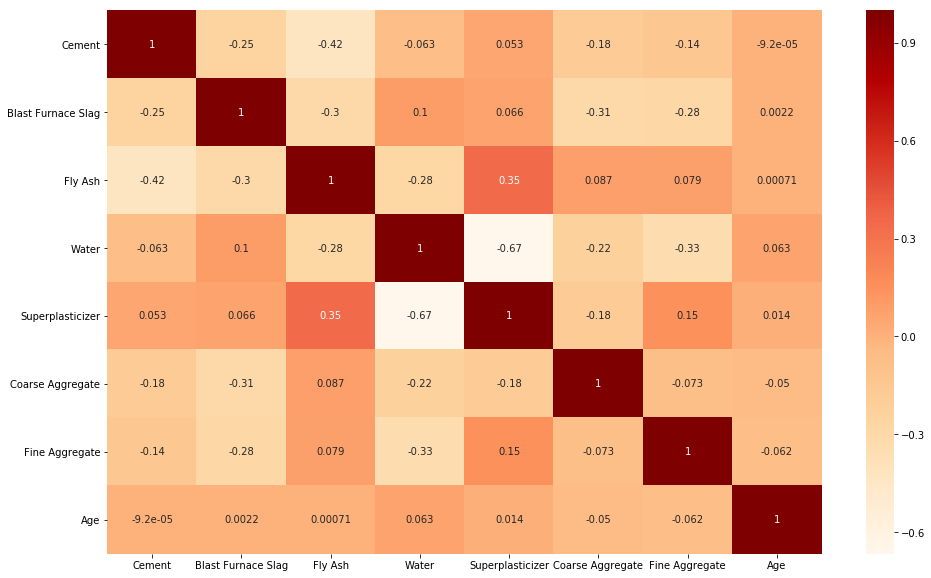

In [13]:
#Used to check if feature selection is removing the insignificant and correlated data
ax, fig = plt.subplots(figsize = (16, 10))
correlation_matrix = x_bin.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = "OrRd")
plt.show()

C:\Users\reuben\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Optimal number of features:  7


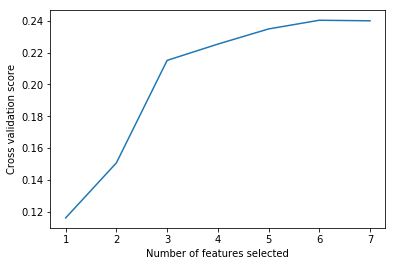

C:\Users\reuben\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Optimal number of features:  6


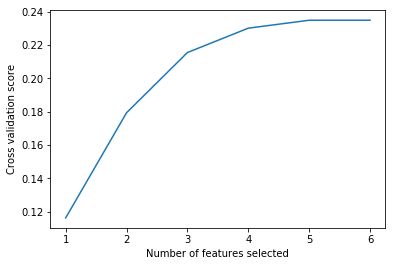

C:\Users\reuben\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Optimal number of features:  6


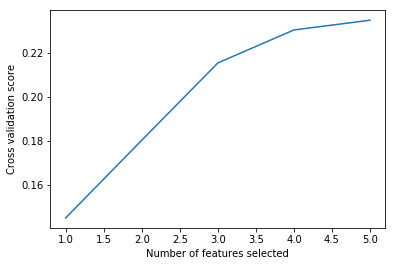

Features beforehand: 8 , features removed : 2 , end optimal number of features :  6


In [14]:
#Feature selection using kbest to find attributes of the concrete that are statistically significant when calculating its strength
def feature_sel(x):
    enc = LabelEncoder()
    strength = enc.fit_transform(y)
    clf = DecisionTreeClassifier()
    #Using 3-fold cross validation decision tree
    rfecv = RFECV(estimator = clf, step = 1, cv = StratifiedKFold(3), scoring = "accuracy", min_features_to_select = 2)
    rfecv.fit(x, strength)
    
    greatest = 1
    count = 0
    remove = ""
    features = list(x.columns)
    print("Optimal number of features: ", rfecv.n_features_) #We can see if each iteration causes the number of optimal features to change and if this corresponds to the number removed
    
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()
    
    for i in range(0, len(features)):
        if rfecv.ranking_[i] > 1:
            count += 1
        if rfecv.ranking_[i] > greatest:
            greatest == rfecv.ranking_[i]
            remove = ""
            remove += features[i]
    if remove != "":
        finish = x.drop(remove, axis = 1)
        remove = ""
        return finish, count
    else:
        return x, 0
    
x_binFeature, check = feature_sel(x_bin)
count = 0
while check > 0: #This removes the least significant attribute then runs the feature selection again to see if there is still a reason to remove a data point (still insignificant)
    x_binFeature, check = feature_sel(x_binFeature) 
    count += 1
    
print("Features beforehand:", 8, ", features removed :", count, ", end optimal number of features : ", 8 - count) #If final optimal features = 6 then we expect 10 - 6 to be removed EXAMPLE

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#Train on 70% of the data and test on 30%
train_x, test_x, train_y, test_y = train_test_split(x_binFeature, y, test_size = 0.3)

In [17]:
from sklearn.linear_model import SGDRegressor

In [18]:
#Using a Linear model with Stochastic Gradient Descent to minimise chance that model gets stuck in local minima 
model = SGDRegressor()

model.fit(train_x, train_y)

C:\Users\reuben\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

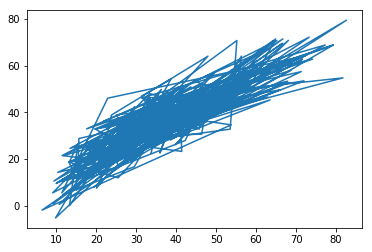

In [19]:
model.coef_

predicted = model.predict(test_x)
plt.plot(test_y, predicted) #Visualisation of model prediction accuracy

In [20]:
model.score(test_x, test_y)

0.7473457406017059

In [21]:
#Compared to auto-mpg which I got an accuracy of 0.9959822026464998, this model is more inconsistent and less precise